Load necessary modules

In [1]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

Create artificial data

In [2]:
# fix seed for random number generation
np.random.seed(111)

mu = 0.0
sigma = 1.15
N= 51

X = np.linspace(-4,4,N)
X = X.reshape(-1,1)

y = np.zeros(N)
y = y.reshape(-1,1)

epsilon = np.random.normal(mu,sigma,N)
epsilon = epsilon.reshape(-1,1)

y = X*X + epsilon

Compute and plot different generalization error approximations

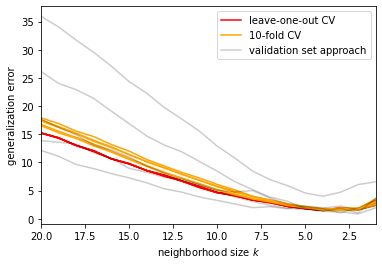

In [3]:
# range of k in kNN regression
kMax = 20

#plt.rcParams.update({'font.size': 16})
plt.figure()


# Compute leave-one-out cross validation an plot it
for s in range(5):

    indices = list(range(N));

    indices_perm = np.random.permutation(indices)

    errors = np.zeros(kMax)

    for k in range(1,kMax+1):

        curr_error = 0

        for l in range(N):


            X_train = X[indices_perm]
            y_train = y[indices_perm]
            X_train = np.delete(X_train,[l])
            y_train = np.delete(y_train,[l])
            X_train = X_train.reshape(-1,1)
            y_train = y_train.reshape(-1,1)

            X_validate = X[indices_perm[l]]
            y_validate = y[indices_perm[l]]
            X_validate=[X_validate]
            y_validate=[y_validate]

            neigh = KNeighborsRegressor(n_neighbors=k)
            neigh.fit(X_train, y_train)
            y_prediction = neigh.predict(X_validate)
            curr_error = curr_error + (y_prediction-y_validate)**2
            
        errors[k-1] = curr_error/N

    if s>0:
        plt.plot(np.linspace(1,kMax,kMax),errors,'r', label="_nolegend_")
    else:
        plt.plot(np.linspace(1,kMax,kMax),errors,'r', label="leave-one-out CV")


# Compute K-fold cross validation and plot it
K = 10
        
for s in range(5):

    indices = list(range(N));

    indices_perm = np.random.permutation(indices)


    indices_perm = np.array_split(indices_perm,K);
    indices_perm=np.asarray(indices_perm)

    errors = np.zeros(kMax)

    for k in range(1,kMax+1):

        curr_error = 0

        for l in range(K):

            subset_indices = list(range(K))
            curr_subset_index = l
            subset_indices.remove(curr_subset_index)

            indices_train = indices_perm[subset_indices]
            indices_train = np.concatenate(indices_train)
            indices_validate = indices_perm[curr_subset_index]

            X_train = X[indices_train]
            y_train = y[indices_train]

            X_validate = X[indices_validate]
            y_validate = y[indices_validate]

            neigh = KNeighborsRegressor(n_neighbors=k)
            neigh.fit(X_train, y_train)
            y_prediction = neigh.predict(X_validate)
            curr_error = curr_error + np.sum((y_prediction-y_validate)**2)/len(y_prediction)

        errors[k-1] = (curr_error/K)

    if s>0:
        plt.plot(np.linspace(1,kMax,kMax),errors,color='orange', label="_nolegend_")
    else:
        plt.plot(np.linspace(1,kMax,kMax),errors,color='orange', label="10-fold CV")
        
        
# Use validation set approach and plot result
N_train = 40

for s in range(5):

    indices = list(range(N));

    indices_perm = np.random.permutation(indices)

    X_train = X[indices_perm[:N_train]]
    y_train = y[indices_perm[:N_train]]
    X_validate = X[indices_perm[N_train:]]
    y_validate = y[indices_perm[N_train:]]
 
    errors = np.zeros(kMax)

    for k in range(1,kMax+1):
        neigh = KNeighborsRegressor(n_neighbors=k)
        neigh.fit(X_train, y_train)
        y_prediction = neigh.predict(X_validate)
        errors[k-1] = np.sum((y_prediction-y_validate)**2)/len(y_prediction)

    if s>0:
        plt.plot(np.linspace(1,kMax,kMax),errors,'k',alpha=0.2,label="_nolegend_")
    else:
        plt.plot(np.linspace(1,kMax,kMax),errors,'k',alpha=0.2,label="validation set approach")
        

# decorate figure        
plt.legend()
plt.xlim(kMax,1)
plt.xlabel("neighborhood size $k$")
plt.ylabel("generalization error")
#plt.title("influence of different splits on error prediction (kNN regression)")
plt.show()